#베이즈 정리를 활용한 분류(참고)

##1. Data Generate

In [ ]:
import pandas as pd
import numpy as np

# 데이터 프레임 생성
data = pd.DataFrame()

# target 변수 지정
data['Gender'] = ['male','male','male','male','female','female','female','female']

# 입력 변수 지정 
data['Height'] = [6,5.92,5.58,5.92,5,5.5,5.42,5.75]
data['Weight'] = [180,190,170,165,100,150,130,150]
data['Foot_Size'] = [12,11,12,10,6,8,7,9]

# View the data
data

,Gender,Height,Weight,Foot_Size
0,male,6.00,180,12
1,male,5.92,190,11
2,male,5.58,170,12
3,male,5.92,165,10
4,female,5.00,100,6
5,female,5.50,150,8
6,female,5.42,130,7
7,female,5.75,150,9


In [ ]:
# Create an empty dataframe
person = pd.DataFrame()

# Create some feature values for this single row
person['Height'] = [6]
person['Weight'] = [130]
person['Foot_Size'] = [8]

# View the data 
person

,Height,Weight,Foot_Size
0,6,130,8


Height = 6, Weight = 130, Foot_Size = 8 인 사람의 성별은 무엇일까?

##2. Naive Bayes 분류기

* 베이즈 정리

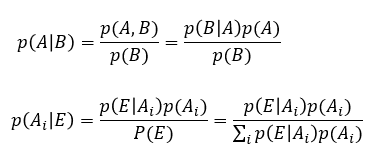

사전확률(Prior Probability)
 - 현재 가지고 있는 정보를 기초로하여 정한 초기 확률 
 - 확률 시행 전에 이미 가지고 있는 지식을 통해 부여한 확률
 - ex) 동전을 던져 앞면이 나올 확률 : 1/2


사후 확률 ( Posteriori Probability)
 - 사건 발생 후에 어떤 원인으로부터 일어난 것이라고 생각되어지는 확률
 - 추가된 정보로부터 사전정보를 새롭게 수정한 확률 ( 수정 확률 )
 - 조건부 확률을 통해 사후확률을 표현할 수 있으며, 사후확률은 베이즈 정리로 부터 계산가능


가능도, 우도(Likelihood)
  * https://jjangjjong.tistory.com/41

In [ ]:
# 사전확률 계산

# 남성 수
n_male = data['Gender'][data['Gender'] == 'male'].count()
# 여성 수
n_female = data['Gender'][data['Gender'] == 'female'].count()

# 전체 인원 수 
total_ppl = data['Gender'].count()

In [ ]:
print(n_male)
print(n_female)
print(total_ppl)

4
4
8


In [ ]:
# 남성일 확률
p_male = n_male/total_ppl

# 여성일 확률
p_female = n_female/total_ppl

print(p_male)
print(p_female)

0.5
0.5


* Likelihood 계산

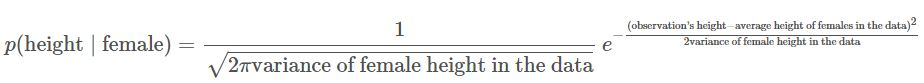



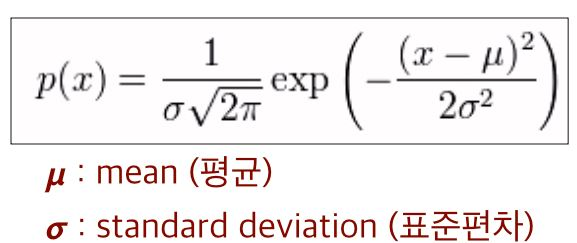

In [ ]:
# 성별에 따른 신체 치수 평균 
data_means = data.groupby('Gender').mean()

data_means

,Height,Weight,Foot_Size
Gender,,,
female,5.4175,132.50,7.50
male,5.8550,176.25,11.25


In [ ]:
# 성별에 따른 신체 치수 분산
data_variance = data.groupby('Gender').var()

data_variance

,Height,Weight,Foot_Size
Gender,,,
female,0.097225,558.333333,1.666667
male,0.035033,122.916667,0.916667


In [ ]:
# 남성 치수 평균 
male_height_mean = data_means.loc['male', 'Height']
male_weight_mean = data_means.loc['male', 'Weight']
male_footsize_mean = data_means.loc['male', 'Foot_Size']

# 남성 치수 분산
male_height_variance = data_variance.loc['male', 'Height']
male_weight_variance = data_variance.loc['male', 'Weight']
male_footsize_variance = data_variance.loc['male', 'Foot_Size']

# 여성 치수 평균
female_height_mean = data_means.loc['female', 'Height']
female_weight_mean = data_means.loc['female', 'Weight']
female_footsize_mean = data_means.loc['female', 'Foot_Size']

# 여성 치수 분산
female_height_variance = data_variance.loc['female', 'Height']
female_weight_variance = data_variance.loc['female', 'Weight']
female_footsize_variance = data_variance.loc['female', 'Foot_Size']

In [ ]:
male_height_mean

5.855

In [ ]:
def p_x_given_y(x, mean_y, variance_y):
    # Input the arguments into a probability density function
    p = 1/(np.sqrt(2*np.pi*variance_y)) * np.exp((-(x-mean_y)**2)/(2*variance_y))   
    # return p
    return p

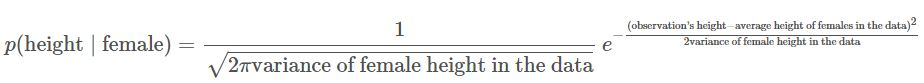

In [ ]:
person

,Height,Weight,Foot_Size
0,6,130,8


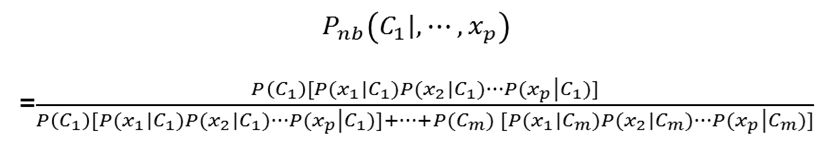

In [ ]:
# 분자 계산
p1 = (p_male * 
      p_x_given_y(person['Height'][0], male_height_mean, male_height_variance) * 
      p_x_given_y(person['Weight'][0], male_weight_mean, male_weight_variance) * 
      p_x_given_y(person['Foot_Size'][0], male_footsize_mean, male_footsize_variance))
p1

6.197071843878078e-09

In [ ]:
# 분자 계산
p2= (p_female * p_x_given_y(person['Height'][0], female_height_mean, female_height_variance) * 
  p_x_given_y(person['Weight'][0], female_weight_mean, female_weight_variance) * p_x_given_y(person['Foot_Size'][0], female_footsize_mean, female_footsize_variance))
p2

0.0005377909183630018

In [ ]:
max(p1, p2)

0.0005377909183630018

# 타이타닉 생존자 분류

##1. Data Load

* 변수 설명

| 변수     | 설명                                             |
| -------- | ------------------------------------------------ |
| survived | 생존여부( 0: 사망, 1: 생존)                      |
| pclass   | 자리 등급(1: 1등석, 2: 2등석, 3: 3등석)          |
| sex      | 성별(male: 남성, female: 여성)                   |
| age      | 나이                                             |
| sibsp    | 타이타닉 호에 동승한 자매 / 배우자의 수          |
| parch    | 타이타닉 호에 동승한 부모 / 자식의 수            |
| fare     | 승객 요금                                        |
| embarked | 탑승지(C: 셰르부르, Q: 퀸즈타운, S=사우스햄프턴) |
| alone    | 혼자 탑승했는지에 대한 여부 (True, False)        |

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/hrbae/DRB_ML_Training/main/2022/week7/data/titanic.csv')

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


##2. 탐색적 데이터 분석(EDA)

In [ ]:
df['survived'].value_counts()

0    394
1    261
Name: survived, dtype: int64

In [ ]:
dead = df.loc[df['survived']==0,:]
alive = df.loc[df['survived']==1,:]

In [ ]:
dead

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
4,0,3,male,35.0,0,0,8.0500,S,True
5,0,1,male,54.0,0,0,51.8625,S,True
6,0,3,male,2.0,3,1,21.0750,S,False
11,0,3,male,20.0,0,0,8.0500,S,True
...,...,...,...,...,...,...,...,...,...
646,0,2,male,31.0,1,1,37.0042,C,False
647,0,3,male,43.0,0,0,6.4500,S,True
648,0,3,male,10.0,3,2,27.9000,S,False
651,0,1,male,38.0,0,0,0.0000,S,True


In [ ]:
#자리 별 사망 및 생존 비율
print(dead['pclass'].value_counts()/len(dead))
print(alive['pclass'].value_counts()/len(alive))

3    0.63198
2    0.21066
1    0.15736
Name: pclass, dtype: float64
1    0.417625
3    0.291188
2    0.291188
Name: pclass, dtype: float64


In [ ]:
#성별에 따른 사망 및 생존 비율
print(dead['sex'].value_counts()/len(dead))
print(alive['sex'].value_counts()/len(alive))

male      0.847716
female    0.152284
Name: sex, dtype: float64
female    0.678161
male      0.321839
Name: sex, dtype: float64


In [ ]:
print(dead['alone'].mean())
print(alive['alone'].mean())

0.6370558375634517
0.45977011494252873


##3. 데이터 전처리

In [ ]:
df.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
alone          bool
dtype: object

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


###3-1. 더미 변수화

* 학습을 위한 형태로 데이터 타입 변환

In [ ]:
df['alone'] = pd.Categorical(df['alone'])

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [ ]:
df = pd.get_dummies(df, drop_first = False)

df.head()

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,alone_True
0,0,3,22.0,1,0,7.2500,1,0,1,0
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,1
3,1,1,35.0,1,0,53.1000,0,0,1,0
4,0,3,35.0,0,0,8.0500,1,0,1,1


###3-2. 데이터 분리

* 학습을 위해 X,y 분리 및 train / test 분할

In [ ]:
y = df.loc[:, 'survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
650    1
651    0
652    1
653    0
654    1
Name: survived, Length: 655, dtype: int64

In [ ]:
X = df.loc[:, 'pclass':]

X

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,alone_True
0,3,22.0,1,0,7.2500,1,0,1,0
1,1,38.0,1,0,71.2833,0,0,0,0
2,3,26.0,0,0,7.9250,0,0,1,1
3,1,35.0,1,0,53.1000,0,0,1,0
4,3,35.0,0,0,8.0500,1,0,1,1
...,...,...,...,...,...,...,...,...,...
650,3,27.0,0,0,8.6625,1,0,1,1
651,1,38.0,0,0,0.0000,1,0,1,1
652,3,27.0,0,1,12.4750,0,0,1,0
653,3,2.0,4,1,39.6875,1,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 2022)



In [ ]:
X_train, y_train

(     pclass   age  sibsp  parch      fare  sex_male  embarked_Q  embarked_S  \
 534       3  20.0      0      0    9.2250         1           0           1   
 462       3  22.0      0      0    8.0500         1           0           1   
 222       3  35.0      1      1   20.2500         0           0           1   
 198       1  37.0      1      1   52.5542         1           0           1   
 433       1  17.0      0      2  110.8833         1           0           0   
 ..      ...   ...    ...    ...       ...       ...         ...         ...   
 18        2  34.0      0      0   13.0000         1           0           1   
 240       3  19.0      0      0    0.0000         1           0           1   
 624       2  16.0      0      0   26.0000         1           0           1   
 173       1  32.0      0      0   76.2917         0           0           0   
 220       3  45.0      0      0    7.7500         0           0           1   
 
      alone_True  
 534           1  


##4. 모델링

In [ ]:
#어떠한 확률 분포에서 우도를 뽑아내는 가에 따라 여러가지 Naiv Bayes 종류
#정규분포에서 가장 흔하게 사용 
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)

GaussianNB()

In [ ]:
pred_train = model.predict(X_train)

pred_train

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,

##5. 모델 평가

In [ ]:
from sklearn.metrics import confusion_matrix

m = confusion_matrix(y_train, pred_train)
m

array([[239,  41],
       [ 56, 122]])

In [ ]:
np.sum(np.diag(m))/len(X_train)

0.7882096069868996

In [ ]:
pred_test = model.predict(X_test)

m = confusion_matrix(y_test, pred_test)

np.sum(np.diag(m))/len(X_test)

0.7817258883248731